<a href="https://colab.research.google.com/github/gregworks/Hands-on-Generative-AI/blob/main/Day-2/Part-1_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Outline**

- Building Autoencoders
  - Recap of Autoencoders
- Implementing an Autoencoder using PyTorch
- Training and Evaluating the Model

<img src="https://github.com/gregworks/Hands-on-Generative-AI/blob/main/Day-2/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

# **[Autoencoders](https://arxiv.org/abs/2201.03898)**

- One of the most popular type of neural network for **processing structured grid data** is CNN (Convolutional Neural Network).
  - Most commonly used for **image processing**.
  
- Key Components of CNN

  1. **Convolutional Layer**: Extracts features using filters.
  2. **Pooling Layer**: Reduces spatial dimensions while retaining important information.
  3. **Fully Connected Layer**: Regular neural network layer for final classification.


![AutoEncoder Diagram](https://github.com/gregworks/Hands-on-Generative-AI/blob/main/Day-2/images/CNN.jpeg?raw=1)


- Problem with CNN Training

  - One key challenge: Need **a lot of labeled data** for training.
  - Image classification requires manual categorization into classes.


- Self-Supervised Learning

  - Using raw (unlabeled) data for training CNN feature extractors.
  - Known as **self-supervised learning**.
  - Training images are used as both **input and output**.


- Autoencoders
  1. **Encoder Network**: Converts the input image into a latent space.
  2. **Decoder Network**: Aims to reconstruct the original image.
  
- Why Autoencoders?

  - They aim to capture as much information from the original image as possible.
  - This allows for accurate reconstruction.
  - The network seeks the best embedding of input images to capture their essence.


## **Autoencoder Diagram**

![AutoEncoder Diagram](https://github.com/gregworks/Hands-on-Generative-AI/blob/main/Day-2/images/autoencoder_schema.jpg?raw=1)

> Image sourced from [Keras blog](https://blog.keras.io/building-autoencoders-in-keras.html)


<img src="https://github.com/gregworks/Hands-on-Generative-AI/blob/main/Day-2/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

## **Example**

- **Objective**:
  - Understand autoencoders using a basic example.
  - Compress and reconstruct 2D synthetic data points.

1. **Data**:
    - Four synthetic 2D points: `[1.0, 2.0], [2.0, 3.0], ...`
2. **Autoencoder**:
    - **Encoder**: Transforms 2D points to 1D.
    - **Decoder**: Reconstructs 1D points back to 2D.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


# Simple synthetic dataset: 2D points
data = torch.tensor([[1.0, 2.0], [2.0, 3.0], [3.0, 4.0], [4.0, 5.0]])



In [2]:
# Define the autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Define the encoder part of the autoencoder with a linear layer.
        # This linear layer will reduce the input dimension from 2 to 1.
        # In other words, it's learning a compressed representation of the input data.
        # The input dimension is 2, and the output dimension is 1, which means it's
        # projecting a 2D input space onto a 1D space.
        self.encoder = nn.Linear(2, 1)
        # Define the decoder part of the autoencoder with a linear layer.
        # This linear layer will expand the compressed representation (1D) back to the original input dimension (2D).
        # In other words, it's responsible for reconstructing the original input from the compressed representation.
        # The input dimension is 1, and the output dimension is 2, which means it's mapping the 1D representation
        # back to the original 2D space.
        self.decoder = nn.Linear(1, 2)

    # Define the forward pass of the autoencoder.
    # This method takes an input 'x' and passes it through both the encoder and decoder parts.
    # 1. 'x' is first passed through the encoder, which reduces the dimensionality of the input.
    # 2. The result of the encoder is then passed through the decoder, which aims to reconstruct
    #    the original input from the compressed representation.
    # 3. The final output 'x' represents the reconstructed data.
    # Essentially, this method encodes the input and then decodes it to obtain the reconstruction.
    def forward(self, x):
        # Pass the input through the encoder to obtain the compressed representation
        x = self.encoder(x)

        # Pass the compressed representation through the decoder to reconstruct the input
        x = self.decoder(x)

        # Return the reconstructed data
        return x


In [3]:
# Initialize model, loss function, and optimizer
model = Autoencoder()
criterion = nn.MSELoss()  # Mean Squared Error Loss: Measures the difference between the original and reconstructed data
# Define the optimizer for training the autoencoder.
# The optimizer is Adam, a popular optimization algorithm that adjusts the model's parameters
# during training to minimize the loss.
#   A learning rate of 0.01 means that the optimizer will make relatively small updates to the parameters
#   in each training iteration.
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [4]:
# --- TRAINING ---

# Training loop
num_epochs = 1000
losses = []  # To store loss values for visualization
for epoch in range(num_epochs):
    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass: Pass the data through the model to get the reconstructed output
    outputs = model(data)

    # Compute loss: Difference between original data and reconstructed data
    loss = criterion(outputs, data)

    # Backward pass: Adjust model parameters to minimize the loss
    loss.backward()
    optimizer.step()

    # Store the loss value for this epoch
    losses.append(loss.item())

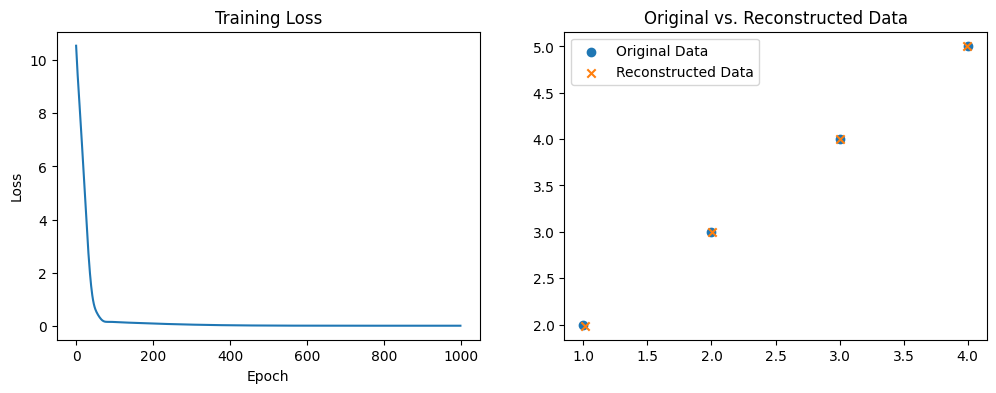

Original Data: tensor([[1., 2.],
        [2., 3.],
        [3., 4.],
        [4., 5.]])
Encoded Data: tensor([[-1.4739],
        [-2.5358],
        [-3.5978],
        [-4.6597]])
Decoded Data: tensor([[1.0122, 1.9872],
        [2.0057, 2.9940],
        [2.9993, 4.0008],
        [3.9929, 5.0076]])


In [5]:
# Plot the loss over epochs: This will show how the model improves over time
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

# Visualize the original and reconstructed data points
plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], marker='o', label='Original Data')
plt.scatter(outputs.detach()[:, 0], outputs.detach()[:, 1], marker='x', label='Reconstructed Data')
plt.legend()
plt.title('Original vs. Reconstructed Data')
plt.show()

# Display the original data, encoded data, and the reconstructed data
print("Original Data:", data)
print("Encoded Data:", model.encoder(data).detach())  # Using detach() to get data from tensor
print("Decoded Data:", outputs.detach())

<img src="https://github.com/gregworks/Hands-on-Generative-AI/blob/main/Day-2/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

## **Excercise:**

- Expand the latent space to 2 or 3 dimensions instead of 1.
  - is it more accurate?
  - Does it make sense to increase the dimensions?


 <!-- self.encoder = nn.Linear(2, 2)
        
        # Decoder: 2D -> 2D. This will reconstruct the original input from the encoded form.
        self.decoder = nn.Linear(2, 2) -->

<img src="https://github.com/gregworks/Hands-on-Generative-AI/blob/main/Day-2/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

## **Building an Autoencoder using PyTorch for MNIST**


### MNIST Dataset Overview

- **Type:** Handwritten Digits
- **Images:** 70,000
  - **Training:** 60,000
  - **Testing:** 10,000
- **Size:** 28 x 28 pixels
- **Grayscale:** 0 (Black) to 255 (White)
- **Use:** Benchmark for classification algorithms

1. Import Necessary Libraries


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:09<00:00, 1044604.68it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 134885.67it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1262509.17it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2794152.06it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Number of training samples: 60000
Image shape: torch.Size([1, 28, 28])


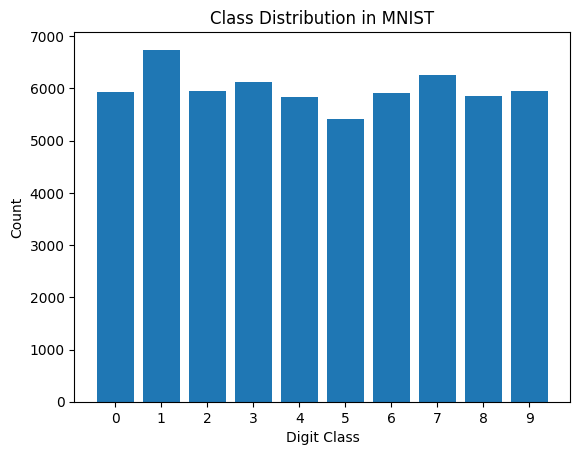

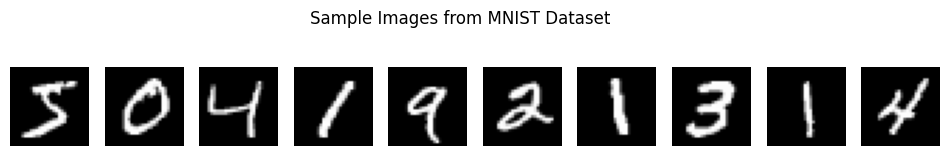

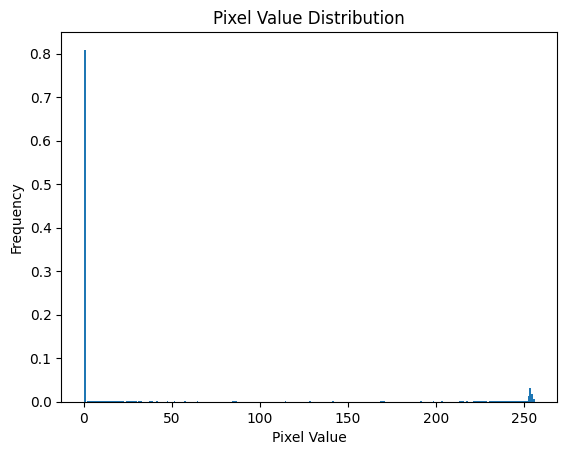

Mean Pixel Value: 33.318421449829934
Standard Deviation of Pixel Value: 78.56748998339798


In [7]:
# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)

# 1. Dataset Size and Structure
print(f"Number of training samples: {len(train_dataset)}")
print(f"Image shape: {train_dataset[0][0].shape}")

# 2. Class Distribution
class_counts = np.bincount(train_dataset.targets)
plt.bar(range(10), class_counts)
plt.xlabel("Digit Class")
plt.ylabel("Count")
plt.title("Class Distribution in MNIST")
plt.xticks(range(10))
plt.show()

# 3. Sample Images
sample_images = [train_dataset[i][0] for i in range(10)]
fig, axes = plt.subplots(1, 10, figsize=(12, 2))
for i, ax in enumerate(axes):
    ax.imshow(sample_images[i][0], cmap='gray')
    ax.axis('off')
plt.suptitle("Sample Images from MNIST Dataset")
plt.show()

# 4. Pixel Value Distribution
pixel_values = train_dataset.data.numpy().flatten()
plt.hist(pixel_values, bins=256, range=(0, 256), density=True)
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.title("Pixel Value Distribution")
plt.show()

# 6. Image Statistics
mean_pixel_value = np.mean(pixel_values)
std_pixel_value = np.std(pixel_values)
print(f"Mean Pixel Value: {mean_pixel_value}")
print(f"Standard Deviation of Pixel Value: {std_pixel_value}")

plt.show()


2. Data Loading and Preprocessing


In [8]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)

3. Define the Autoencoder Architecture


In [9]:
class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        # It consists of a sequence of two layers:
        # 1. Linear Layer: This layer performs a linear transformation on the input, reducing it to 'encoding_dim' dimensions.
        #    - Input size: 28*28 (flatten MNIST image)
        #    - Output size: 'encoding_dim'
        # 2. ReLU Activation: The Rectified Linear Unit (ReLU) activation function introduces non-linearity
        #    by replacing negative values with zeros.
        #    - It helps the model learn complex patterns in the data.
        #    - 'nn.ReLU(True)' means that 'in-place' ReLU is used, which modifies the input tensor directly.
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, encoding_dim),  # Input: 28*28, Output: encoding_dim
            nn.ReLU(True)  # Apply ReLU activation
        )

        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 28 * 28),
            nn.Sigmoid()  # To bring the values between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


**3.1. Encoder Definition**

- The encoder compresses the input into a latent space.
- nn.Sequential is a container that sequences the layers in order.
- nn.Linear(28 * 28, encoding_dim) creates a fully connected layer. The input size is 784 (28x28, size of MNIST images), and the output is the encoding dimension.
- nn.ReLU(True) is the activation function. ReLU stands for Rectified Linear Unit.

**3.2. Decoder Definition**

- The decoder reconstructs the original input from the encoded form.
- nn.Linear(encoding_dim, 28 * 28) creates a fully connected layer. This layer takes the encoded representation and tries to expand it back to the original size.
- nn.Sigmoid() is the activation function. It ensures the output values are between 0 and 1, making it suitable for image reconstruction.

4. Model, Loss, and Optimizer Initialization


In [10]:
model = Autoencoder(encoding_dim=64)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

5. Training the Autoencoder

In [11]:
num_epochs = 10

# Outer loop for epochs with tqdm
for epoch in tqdm(range(num_epochs), desc="Epochs"):
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1)  # Flatten the images
        output = model(img)
        loss = criterion(output, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

Epochs:  10%|█         | 1/10 [00:09<01:23,  9.25s/it]

Epoch [1/10], Loss: 0.0278


Epochs:  20%|██        | 2/10 [00:18<01:13,  9.22s/it]

Epoch [2/10], Loss: 0.0140


Epochs:  30%|███       | 3/10 [00:26<01:01,  8.73s/it]

Epoch [3/10], Loss: 0.0109


Epochs:  40%|████      | 4/10 [00:35<00:52,  8.73s/it]

Epoch [4/10], Loss: 0.0090


Epochs:  50%|█████     | 5/10 [00:44<00:43,  8.72s/it]

Epoch [5/10], Loss: 0.0070


Epochs:  60%|██████    | 6/10 [00:52<00:34,  8.65s/it]

Epoch [6/10], Loss: 0.0067


Epochs:  70%|███████   | 7/10 [01:00<00:25,  8.48s/it]

Epoch [7/10], Loss: 0.0061


Epochs:  80%|████████  | 8/10 [01:09<00:17,  8.53s/it]

Epoch [8/10], Loss: 0.0071


Epochs:  90%|█████████ | 9/10 [01:18<00:08,  8.59s/it]

Epoch [9/10], Loss: 0.0053


Epochs: 100%|██████████| 10/10 [01:25<00:00,  8.59s/it]

Epoch [10/10], Loss: 0.0059


<img src="https://github.com/gregworks/Hands-on-Generative-AI/blob/main/Day-2/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

## **How good is our autoencoder?**

6. Load and Preprocess the Test Data

In [12]:
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

7. Evaluate the Model

In [13]:
model.eval()
total_loss = 0
with torch.no_grad():
    for data in test_loader:
        img, _ = data
        img = img.view(img.size(0), -1)
        output = model(img)
        loss = criterion(output, img)
        total_loss += loss.item()

avg_loss = total_loss / len(test_loader)
print(f"Average Reconstruction Loss on Test Set: {avg_loss:.4f}")

Average Reconstruction Loss on Test Set: 0.0056


<img src="https://github.com/gregworks/Hands-on-Generative-AI/blob/main/Day-2/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

8. Visualization of Original vs Reconstructed Images

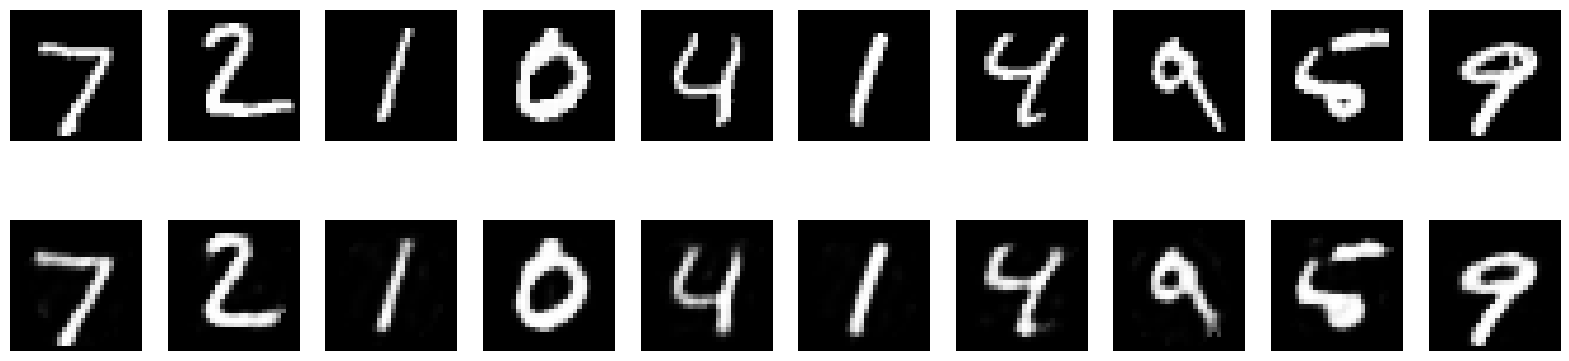

In [14]:
import matplotlib.pyplot as plt

# Fetch a batch of images from the test set
dataiter = iter(test_loader)
images, _ = next(dataiter)

# Pass images through the autoencoder
with torch.no_grad():
    images_flatten = images.view(images.size(0), -1)
    outputs = model(images_flatten)
    outputs = outputs.view(outputs.size(0), 1, 28, 28)

# Display original and reconstructed images side by side
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(20, 5))
for i in range(10):
    axes[0][i].imshow(images[i][0].cpu().numpy(), cmap='gray')
    axes[1][i].imshow(outputs[i][0].cpu().numpy(), cmap='gray')
    axes[0][i].axis('off')
    axes[1][i].axis('off')

plt.show()


<img src="https://github.com/gregworks/Hands-on-Generative-AI/blob/main/Day-2/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

## Question

Assume that you built a perfect autoencoder, what is the primary motivation?

<!-- encoded_representation = autoencoder.encoder(input_data) -->

<img src="https://github.com/gregworks/Hands-on-Generative-AI/blob/main/Day-2/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

# Define the Advanced Autoencoder with Convolutional Layers

In [15]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x, indices1 = self.pool(x)
        x = F.relu(self.conv2(x))
        x, indices2 = self.pool(x)
        return x, (indices1, indices2)


In [16]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.unpool = nn.MaxUnpool2d(kernel_size=2, stride=2)
        self.deconv1 = nn.ConvTranspose2d(32, 16, kernel_size=3, stride=1, padding=1)
        self.deconv2 = nn.ConvTranspose2d(16, 1, kernel_size=3, stride=1, padding=1)

    def forward(self, x, indices):
        indices1, indices2 = indices
        x = self.unpool(x, indices2)
        x = F.relu(self.deconv1(x))
        x = self.unpool(x, indices1)
        x = torch.sigmoid(self.deconv2(x))
        return x


In [17]:
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def forward(self, x):
        x, indices = self.encoder(x)
        x = self.decoder(x, indices)
        return x


 1. Import Necessary Libraries

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

2. Set Hyperparameters & Data Loading


In [19]:
BATCH_SIZE = 64
EPOCHS = 5
LR = 0.001

transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

test_dataset = datasets.MNIST('./data', train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


3. Define the Autoencoder


In [20]:
model = ConvAutoencoder().to(device)


4. Define Loss and Optimizer


In [21]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LR)


5. Train the Autoencoder


In [22]:
for epoch in range(EPOCHS):
    model.train()
    train_loss = 0

    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()

        outputs = model(data)
        loss = criterion(outputs, data)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader.dataset)
    print(f"Epoch: {epoch+1}/{EPOCHS}, Train Loss: {train_loss:.4f}")


Epoch: 1/5, Train Loss: 0.0002
Epoch: 2/5, Train Loss: 0.0000
Epoch: 3/5, Train Loss: 0.0000
Epoch: 4/5, Train Loss: 0.0000
Epoch: 5/5, Train Loss: 0.0000


6. Test and Visualize Results


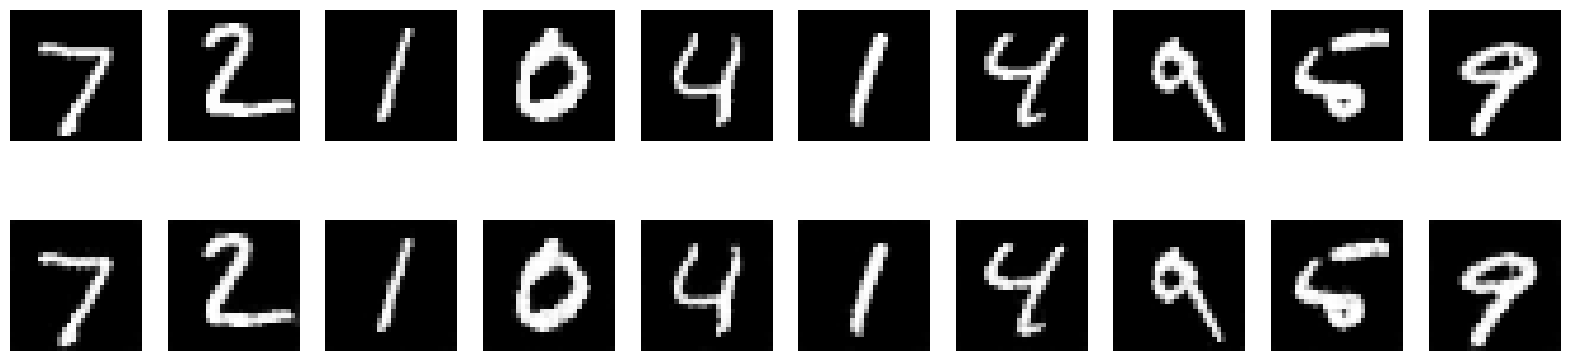

In [23]:
model.eval()
with torch.no_grad():
    dataiter = iter(test_loader)
    images, _ = next(dataiter)
    images = images.to(device)
    outputs = model(images)

    fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(20, 5))
    for i in range(10):
        axes[0][i].imshow(images[i][0].cpu().numpy(), cmap='gray')
        axes[1][i].imshow(outputs[i][0].cpu().numpy(), cmap='gray')
        axes[0][i].axis('off')
        axes[1][i].axis('off')

    plt.show()


<img src="https://github.com/gregworks/Hands-on-Generative-AI/blob/main/Day-2/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

## **Denoising**

Autoencoders are powerful neural network architectures commonly used for dimensionality reduction, anomaly detection, and more. One of their exciting applications is in **denoising images**.

### How Does it Work?

1. **Starting Point**: Use original, noise-free images.
2. **Add Artificial Noise**: Before feeding them to the autoencoder, introduce some random noise to these images.
3. **Training Objective**: Train the autoencoder using the noisy images as input, aiming to reconstruct the original noise-free images as its output.

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Data loading
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)



In [25]:
# Add noise function
def add_noise(img, noise_factor=0.5):
    noise = torch.randn_like(img) * noise_factor
    noisy_img = img + noise
    return torch.clamp(noisy_img, 0., 1.)

In [26]:
# Training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ConvAutoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        noisy_img = add_noise(img)
        noisy_img = noisy_img.to(device)
        optimizer.zero_grad()
        outputs = model(noisy_img)
        loss = criterion(outputs, img.to(device))
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/5], Loss: 0.0133
Epoch [2/5], Loss: 0.0140
Epoch [3/5], Loss: 0.0135
Epoch [4/5], Loss: 0.0127
Epoch [5/5], Loss: 0.0109


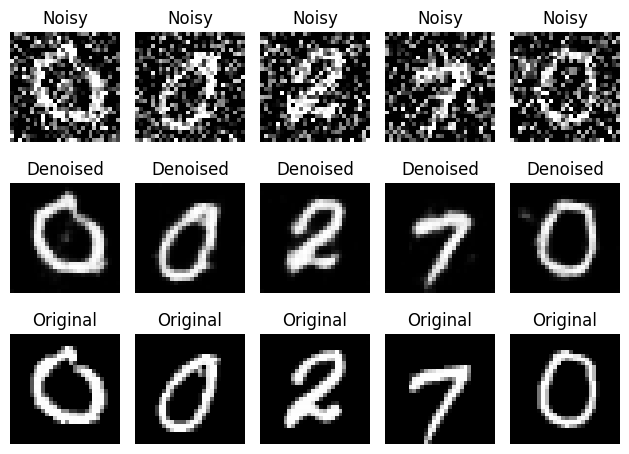

In [27]:
# Visualization
model.eval()
with torch.no_grad():
    # Get a batch of data
    for data in train_loader:
        images, _ = data
        noisy_images = add_noise(images)

        outputs = model(noisy_images.to(device))
        outputs = outputs.cpu()

        # Plot noisy images
        for i in range(5):
            plt.subplot(3, 5, i + 1)
            plt.imshow(noisy_images[i][0], cmap='gray')
            plt.title("Noisy")
            plt.axis('off')

            # Plot denoised images
            plt.subplot(3, 5, i + 6)
            plt.imshow(outputs[i][0], cmap='gray')
            plt.title("Denoised")
            plt.axis('off')

            # Plot original images
            plt.subplot(3, 5, i + 11)
            plt.imshow(images[i][0], cmap='gray')
            plt.title("Original")
            plt.axis('off')

    plt.tight_layout()
    plt.show()


<img src="https://github.com/gregworks/Hands-on-Generative-AI/blob/main/Day-2/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

# Variational Auto-Encoders (VAE)
[Link to Paper](https://arxiv.org/abs/1906.02691)


## Traditional Autoencoders

- Reduce the dimension of the input data.
- Learn essential features of input images.
- **Problem**:
  - Can reconstruct the input.
    - But, doesn't always work as a generative model.
  - Decoding a random input doesn't guarantee a logical image

For instance, with the MNIST dataset:
- Close latent vectors might not relate to the same digits.
- Understanding which digit corresponds to different latent vectors is challenging.


## The Encoder in VAE

- Traditional autoencoder: One latent point for one input.
- VAE's encoder: Produces a **probability distribution** in the latent space.
- Outputs gaussians with parameters.

![Encoder Diagram](https://github.com/gregworks/Hands-on-Generative-AI/blob/main/Day-2/images/VAE3.svg?raw=1)

<img src="https://github.com/gregworks/Hands-on-Generative-AI/blob/main/Day-2/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

# Goal of a Variational Autoencoder

- VAE is a **generative model**.
- Generates fake samples resembling training data.
- For MNIST: Synthesize images of handwritten digits.
- Provides a "latent space" for sampling.
- Decoding any point gives a reasonable image of a digit.


<img src="https://github.com/gregworks/Hands-on-Generative-AI/blob/main/Day-2/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

## Enter the Variational Auto-Encoder (VAE)

- VAEs are designed to understand the latent space better.
- They predict the *statistical distribution* of latent parameters: the **latent distribution**.
- This makes VAEs suitable for training *generative* models.


## VAE Workflow

1. Encoder receives an image.
2. Produces a probability distribution in latent space.
3. Sample a point from this distribution.
4. Decoder uses this point to craft an artificial image.



1. From the input, predict `z_mean` and `z_log`.
2. Instead of standard deviation, we predict its logarithm.
3. Sample a vector (`sample` or `z_val` in code) from the distribution $N(\mathrm{z\_mean},e^{\mathrm{z\_log\_sigma}})$.
4. Decoder then uses the `sample` vector to try and recreate the original image.


<img src="https://github.com/gregworks/Hands-on-Generative-AI/blob/main/Day-2/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

## Visual Representation of VAE
![VAE Diagram](https://github.com/gregworks/Hands-on-Generative-AI/blob/main/Day-2/images/vae.png?raw=1)

> Image Source: [Blog Post by Isaak Dykeman](https://ijdykeman.github.io/ml/2016/12/21/cvae.html)


<img src="https://github.com/gregworks/Hands-on-Generative-AI/blob/main/Day-2/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

# VAE Architecture
Define the Encoder, Reparameterization trick, and Decoder.


In [28]:
class VAEEncoder(nn.Module):
    def __init__(self, device):
        super().__init__()
        self.intermediate_dim = 400
        self.latent_dim = 2
        self.linear = nn.Linear(784, self.intermediate_dim)
        self.z_mean = nn.Linear(self.intermediate_dim, self.latent_dim)
        self.z_log = nn.Linear(self.intermediate_dim, self.latent_dim)
        self.relu = nn.ReLU()
        self.device = device

    def forward(self, input):
        bs = input.shape[0]

        hidden = self.relu(self.linear(input))
        z_mean = self.z_mean(hidden)
        z_log = self.z_log(hidden)

        eps = torch.FloatTensor(np.random.normal(size=(bs, self.latent_dim))).to(device)
        z_val = z_mean + torch.exp(z_log) * eps
        return z_mean, z_log, z_val

In [29]:
class VAEDecoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.intermediate_dim = 400
        self.latent_dim = 2
        self.linear = nn.Linear(self.latent_dim, self.intermediate_dim)
        self.output = nn.Linear(self.intermediate_dim, 784)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, input):
        hidden = self.relu(self.linear(input))
        decoded = self.sigmoid(self.output(hidden))
        return decoded

In [30]:
class VAEAutoEncoder(nn.Module):
    def __init__(self, device):
        super().__init__()
        self.encoder = VAEEncoder(device)
        self.decoder = VAEDecoder()
        self.z_vals = None

    def forward(self, input):
        bs, c, h, w = input.shape[0], input.shape[1], input.shape[2], input.shape[3]
        input = input.view(bs, -1)
        encoded = self.encoder(input)
        self.z_vals = encoded
        decoded = self.decoder(encoded[2])
        return decoded

    def get_zvals(self):
        return self.z_vals

<img src="https://github.com/gregworks/Hands-on-Generative-AI/blob/main/Day-2/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

# VAE Loss and Optimization
Combines reconstruction loss and KL divergence.


Variational auto-encoders use complex loss function that consists of two parts:
* **Reconstruction loss** is the loss function that shows how close reconstructed image is to the target (can be MSE). It is the same loss function as in normal autoencoders.
* **KL loss**, which ensures that latent variable distributions stays close to normal distribution. It is based on the notion of [Kullback-Leibler divergence](https://www.countbayesie.com/blog/2017/5/9/kullback-leibler-divergence-explained) - a metric to estimate how similar two statistical distributions are.

In [31]:
def vae_loss(preds, targets, z_vals):
    mse = nn.MSELoss()
    reconstruction_loss = mse(preds, targets.view(targets.shape[0], -1)) * 784.0
    temp = 1.0 + z_vals[1] - torch.square(z_vals[0]) - torch.exp(z_vals[1])
    kl_loss = -0.5 * torch.sum(temp, axis=-1)
    return torch.mean(reconstruction_loss + kl_loss)

<img src="https://github.com/gregworks/Hands-on-Generative-AI/blob/main/Day-2/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

# Training the VAE
Train the model using both the loss components.


In [32]:
model = VAEAutoEncoder(device).to(device)
optimizer = optim.RMSprop(model.parameters(), lr=LR)

In [33]:
def train_vae(model, optimizer, epochs, device):

    tqdm_iter = tqdm(range(epochs))

    for epoch in tqdm_iter:
        model.train()
        train_loss = 0.0
        test_loss = 0.0

        for batch in train_loader:
            imgs, labels = batch
            imgs = imgs.to(device)
            labels = labels.to(device)

            preds = model(imgs)
            z_vals = model.get_zvals()
            loss = vae_loss(preds, imgs, z_vals)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        model.eval()
        with torch.no_grad():
            for batch in test_loader:
                imgs, labels = batch
                imgs = imgs.to(device)
                labels = labels.to(device)

                preds = model(imgs)
                z_vals = model.get_zvals()
                loss = vae_loss(preds, imgs, z_vals)

                test_loss += loss.item()

        train_loss /= len(train_loader)
        test_loss /= len(test_loader)

        tqdm_dct = {'train loss:': train_loss, 'test loss:': test_loss}
        tqdm_iter.set_postfix(tqdm_dct, refresh=True)
        tqdm_iter.refresh()

In [34]:
train_vae(model, optimizer, 5, device)

100%|██████████| 5/5 [01:05<00:00, 13.18s/it, train loss:=37.1, test loss:=37.1]


<img src="https://github.com/gregworks/Hands-on-Generative-AI/blob/main/Day-2/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

# Visualizing the Results
Display reconstructed images and generated images from latent space.


In [35]:
def plot_Sample(n, data):
    fig, ax = plt.subplots(1, n)
    for i, z in enumerate(data):
        if i == n:
            break
        preprocess = z[0].reshape(1, 28, 28) if z[0].shape[1] == 28 else z[0].reshape(1, 14, 14) if z[0].shape[1] == 14 else z[0]


        ax[i].imshow(preprocess[0])
    plt.show()

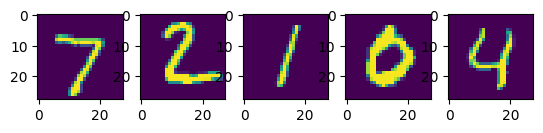

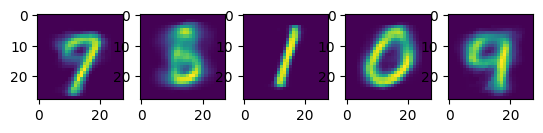

In [36]:
model.eval()
predictions = []
plots = 5
for i, data in enumerate(test_dataset):
    if i == plots:
        break
    predictions.append(model(data[0].to(device).unsqueeze(0)).view(1, 28, 28).detach().cpu())
plot_Sample(plots, test_dataset)
plot_Sample(plots, predictions)

<img src="https://github.com/gregworks/Hands-on-Generative-AI/blob/main/Day-2/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

# Generate a new Image!

In [37]:
import torch

def generate_sample(vae, device):
    # Assume the latent dimension of your VAE is `latent_dim`
    latent_dim = 2  # replace this if your VAE doesn't have this attribute

    # Sample a point from the standard normal distribution
    z = torch.randn(400, latent_dim).to(device)

    # Decode the sampled point to get a new data sample
    with torch.no_grad():
        generated_sample = vae.decoder(z)

    return generated_sample


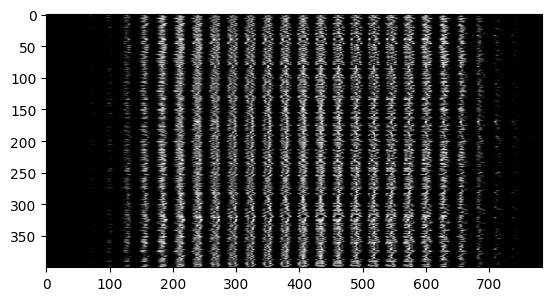

In [38]:
vae_model = model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

new_sample = generate_sample(vae_model, device)

# If you're working with image data, you can then visualize the new sample
# For example:
plt.imshow(new_sample.squeeze().cpu().numpy(), cmap='gray')
plt.show()


<img src="https://github.com/gregworks/Hands-on-Generative-AI/blob/main/Day-2/images/border.jpg?raw=1" height="10" width="1500" align="center"/>

## **Hands on: Latent Space Arithmetic with VAEs**


**Objective:** To explore the semantic representations captured in the latent space of a trained VAE by performing arithmetic operations on the latent representations of digits.




- Encode Several Instances of Specific Digits:
  - Encode multiple instances of two chosen digits, for example '9' and '1'.
  - Extract their latent space representations (z-values).
  - Subtract the representation of '1' from that of '9'.
  - Decode the Result
  - How can the result be interpreted in terms of the semantics of the numbers '9' and '1'?

<!-- digit_9_z_vals = []
digit_1_z_vals = []

for imgs, lbls in train_loader:
    imgs = imgs.to(device)
    _ = vae_model(imgs)
    z_values = vae_model.get_zvals()[2].detach().cpu().numpy()

    digit_9_z_vals.extend(z_values[lbls == 9])
    digit_1_z_vals.extend(z_values[lbls == 1])


avg_9 = np.mean(digit_9_z_vals, axis=0)
avg_1 = np.mean(digit_1_z_vals, axis=0)

resultant_z = avg_9 - avg_1


resultant_z_tensor = torch.FloatTensor(resultant_z).to(device).unsqueeze(0)
decoded_img = vae_model.decoder(resultant_z_tensor).detach().cpu().numpy().reshape(28, 28)

plt.imshow(decoded_img, cmap='gray')
plt.title("Decoded Image from Latent Space Arithmetic")
plt.show() -->



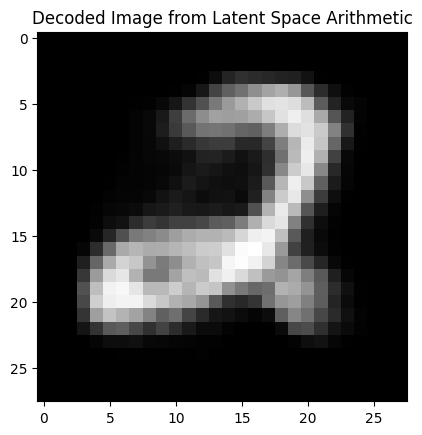

In [39]:


import matplotlib.pyplot as plt
import numpy as np
digit_9_z_vals = []
digit_1_z_vals = []

for imgs, lbls in train_loader:
    imgs = imgs.to(device)
    _ = vae_model(imgs)
    z_values = vae_model.get_zvals()[2].detach().cpu().numpy()

    digit_9_z_vals.extend(z_values[lbls == 9])
    digit_1_z_vals.extend(z_values[lbls == 1])


avg_9 = np.mean(digit_9_z_vals, axis=0)
avg_1 = np.mean(digit_1_z_vals, axis=0)

resultant_z = avg_9 - avg_1


resultant_z_tensor = torch.FloatTensor(resultant_z).to(device).unsqueeze(0)
decoded_img = vae_model.decoder(resultant_z_tensor).detach().cpu().numpy().reshape(28, 28)

plt.imshow(decoded_img, cmap='gray')
plt.title("Decoded Image from Latent Space Arithmetic")
plt.show()


In [40]:
avg_9

array([-0.53630376, -0.6783625 ], dtype=float32)

In [41]:
avg_1

array([-1.2652494,  0.9879237], dtype=float32)